In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))
#print(x1_label0)
#print(x2_label0)
#blah = np.hstack((x1_label0, x2_label0))
#print(blah.shape)
#print(blah[0][0])
#print(blah[1][0])
#print(blah[0][1])
#print(blah[1][1])

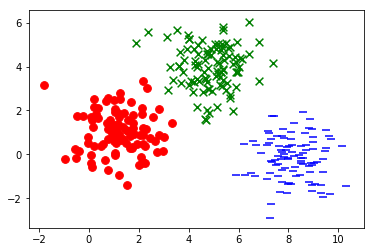

In [3]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [17]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

In [18]:
print(xs.shape)

(300, 2)


In [19]:
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

In [22]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [23]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0.,1.]] * 10)
train_size, num_features = xs.shape

In [24]:
print(xs.shape)

(300, 2)


In [25]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

In [26]:
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [40]:
saver = tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print (step, err)
    
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))
    save_path = saver.save(sess, "./ch4-softmax-reg-model.ckpt")
    print("Model saved in path: %s" % save_path)

0 109.86121
1 112.87814
2 76.742035
3 177.75047
4 646.6988
5 309.50143
6 113.67131
7 58.40545
8 30.707584
9 34.95701
10 21.529602
11 23.697374
12 27.16387
13 18.414423
14 23.464699
15 38.480293
16 14.326302
17 18.285097
18 21.75868
19 11.879347
20 15.87587
21 22.079988
22 11.248846
23 14.230612
24 18.831203
25 9.634368
26 13.101424
27 18.291874
28 8.999866
29 11.868323
30 16.821861
31 8.276224
32 11.340675
33 16.151747
34 7.7895393
35 10.664289
36 15.3375
37 7.3560176
38 10.193923
39 14.712396
40 6.983142
41 9.743234
42 14.130672
43 6.6581492
44 9.353817
45 13.618188
46 6.3711166
47 9.003973
48 13.1579
49 6.1169467
50 8.690311
51 12.744246
52 5.8902936
53 8.40721
54 12.370892
55 5.6870456
56 8.150525
57 12.032675
58 5.503734
59 7.9167323
60 11.725147
61 5.337485
62 7.702881
63 11.444492
64 5.185904
65 7.506475
66 11.187426
67 5.046987
68 7.3253837
69 10.951135
70 4.9190598
71 7.1577926
72 10.733189
73 4.8007107
74 7.0021405
75 10.531491
76 4.690752
77 6.8570876
78 10.344242
79 4.58818


727 1.224934
728 2.606801
729 4.820905
730 1.2220564
731 2.6038036
732 4.8149695
733 1.2191976
734 2.6008298
735 4.8090634
736 1.2163591
737 2.5978801
738 4.8031836
739 1.2135421
740 2.5949516
741 4.797336
742 1.2107446
743 2.5920467
744 4.791515
745 1.2079675
746 2.5891645
747 4.785724
748 1.2052096
749 2.5863044
750 4.7799587
751 1.2024711
752 2.5834653
753 4.7742214
754 1.199752
755 2.580649
756 4.7685103
757 1.1970516
758 2.5778522
759 4.7628274
760 1.194371
761 2.5750787
762 4.7571716
763 1.191708
764 2.5723243
765 4.751542
766 1.1890634
767 2.5695913
768 4.7459373
769 1.1864382
770 2.5668788
771 4.74036
772 1.1838293
773 2.564187
774 4.7348065
775 1.18124
776 2.5615153
777 4.7292805
778 1.1786672
779 2.5588627
780 4.723779
781 1.1761117
782 2.55623
783 4.718302
784 1.173575
785 2.553617
786 4.7128515
787 1.1710544
788 2.5510216
789 4.707423
790 1.168551
791 2.548446
792 4.7020197
793 1.1660651
794 2.5458903
795 4.69664
796 1.1635936
797 2.5433505
798 4.6912847
799 1.1611404
800 2

1481 2.229617
1482 3.8390024
1483 0.8417862
1484 2.228875
1485 3.836259
1486 0.8409756
1487 2.2281334
1488 3.8335197
1489 0.8401694
1490 2.227398
1491 3.8307858
1492 0.83936507
1493 2.226663
1494 3.828057
1495 0.83856374
1496 2.225933
1497 3.825334
1498 0.8377647
1499 2.225205
1500 3.8226178
1501 0.8369689
1502 2.2244809
1503 3.819905
1504 0.8361762
1505 2.2237582
1506 3.8171997
1507 0.8353852
1508 2.223038
1509 3.8144977
1510 0.8345991
1511 2.222322
1512 3.8118033
1513 0.8338157
1514 2.221608
1515 3.8091123
1516 0.83303285
1517 2.2208977
1518 3.8064272
1519 0.83225316
1520 2.220191
1521 3.8037477
1522 0.83147603
1523 2.2194853
1524 3.801074
1525 0.8307021
1526 2.218782
1527 3.7984052
1528 0.82993186
1529 2.2180836
1530 3.7957416
1531 0.829164
1532 2.2173865
1533 3.7930815
1534 0.8283983
1535 2.2166903
1536 3.7904303
1537 0.82763463
1538 2.2159986
1539 3.7877817
1540 0.82687473
1541 2.2153106
1542 3.7851393
1543 0.8261169
1544 2.2146246
1545 3.782502
1546 0.82536197
1547 2.2139404
1548

2356 0.68441737
2357 2.091983
2358 3.209156
2359 0.68404895
2360 2.0916793
2361 3.207438
2362 0.68368214
2363 2.0913782
2364 3.2057235
2365 0.6833161
2366 2.0910752
2367 3.204012
2368 0.68295044
2369 2.090774
2370 3.2023022
2371 0.68258595
2372 2.0904741
2373 3.2005944
2374 0.6822214
2375 2.0901752
2376 3.198889
2377 0.68185866
2378 2.0898764
2379 3.1971848
2380 0.6814959
2381 2.0895784
2382 3.1954834
2383 0.68113303
2384 2.0892813
2385 3.193784
2386 0.6807719
2387 2.0889843
2388 3.1920872
2389 0.68041193
2390 2.0886884
2391 3.190394
2392 0.6800529
2393 2.088393
2394 3.1887016
2395 0.67969346
2396 2.0880978
2397 3.1870108
2398 0.679335
2399 2.0878034
2400 3.1853223
2401 0.6789775
2402 2.087511
2403 3.1836388
2404 0.6786205
2405 2.0872183
2406 3.1819553
2407 0.67826426
2408 2.0869262
2409 3.180272
2410 0.67790884
2411 2.0866349
2412 3.1785944
2413 0.6775542
2414 2.0863445
2415 3.1769187
2416 0.6772006
2417 2.0860543
2418 3.1752436
2419 0.676847
2420 2.0857635
2421 3.173571
2422 0.676494

Model saved in path: ./ch4-softmax-reg-model.ckpt


In [41]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_path)
    print("Model restored.")   
    print(np.argmax(y_model.eval(feed_dict={X: [[6., -2.]], W: W_val, b: b_val}), 1))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ch4-softmax-reg-model.ckpt
Model restored.
[2]
